## FindDefault (Prediction of Credit Card fraud)

## Problem Statement:

A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

We have to build a classification model to predict whether a transaction is fraudulent or not.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('creditcard.csv')

In [6]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Finding the Correlation between the Variables

In [11]:
import pandas as pd

correlation_with_class = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 
                             'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 
                             'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 
                             'V26', 'V27', 'V28', 'Class']].corr()['Class'].drop('Class')

print("Correlation of each feature with the target variable 'Class':")
print(correlation_with_class)

Correlation of each feature with the target variable 'Class':
V1    -0.101347
V2     0.091289
V3    -0.192961
V4     0.133447
V5    -0.094974
V6    -0.043643
V7    -0.187257
V8     0.019875
V9    -0.097733
V10   -0.216883
V11    0.154876
V12   -0.260593
V13   -0.004570
V14   -0.302544
V15   -0.004223
V16   -0.196539
V17   -0.326481
V18   -0.111485
V19    0.034783
V20    0.020090
V21    0.040413
V22    0.000805
V23   -0.002685
V24   -0.007221
V25    0.003308
V26    0.004455
V27    0.017580
V28    0.009536
Name: Class, dtype: float64


## EXPLORATORY  DATA ANALYSIS

## FEATURE IMPORTANCE

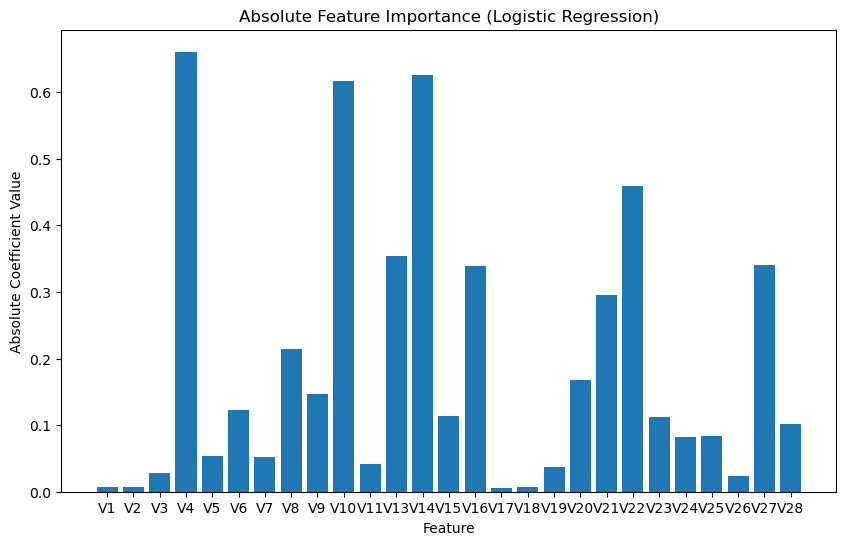

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Assuming you have your data loaded into a DataFrame named 'data'
# X should contain features V1 to V28, and y should contain the target variable if applicable

# Assuming X contains features V1 to V28 and y contains the target variable
X = df[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']]
y = df['Class']  # If you have a target variable, replace 'target_variable' with its name

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Fit the model to the data
log_reg.fit(X, y)

# Get coefficients
coefficients = log_reg.coef_[0]

# Get feature names
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_names, np.abs(coefficients))
plt.title("Absolute Feature Importance (Logistic Regression)")
plt.xlabel("Feature")
plt.ylabel("Absolute Coefficient Value")
plt.show()

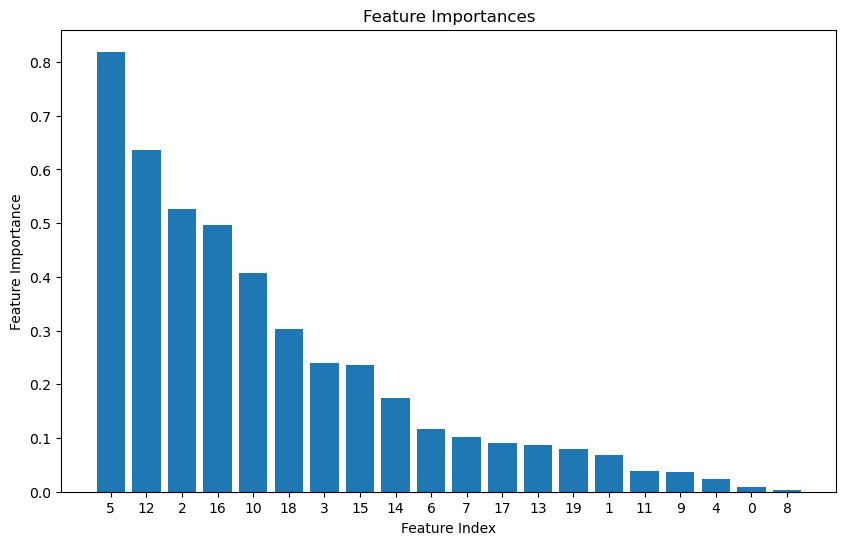

Top 10 important features:
[ 2  3  5  6 10 12 14 15 16 18]


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Generate some example data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, random_state=42)

# Train a Logistic Regression classifier
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X, y)

# Plot feature importances
plt.figure(figsize=(10, 6))
importances = np.abs(clf.coef_[0])  # Using absolute coefficients as feature importances
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Feature Importances")
plt.show()

# Select top 10 important features
sfm = SelectFromModel(clf, threshold=-np.inf, max_features=10)
sfm.fit(X, y)
selected_features = X[:, sfm.get_support(indices=True)]

# Print selected feature indices
print("Top 10 important features:")
print(np.where(sfm.get_support())[0])

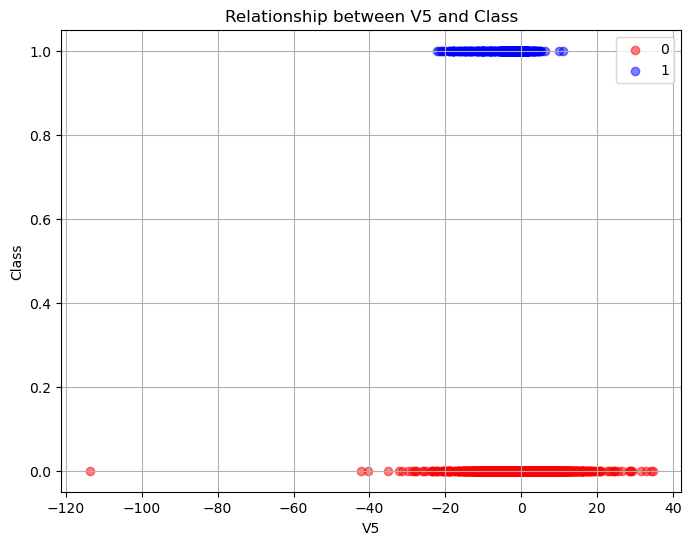

In [18]:
import matplotlib.pyplot as plt

# Example data (replace these with your actual data)
V5 = df['V5']
Class = df['Class']

# Plot
plt.figure(figsize=(8, 6))

# Scatter plot
for class_label, color in zip(set(Class), ['red', 'blue']):
    class_indices = [i for i, c in enumerate(Class) if c == class_label]
    plt.scatter([V5[i] for i in class_indices], 
                [class_label] * len(class_indices), 
                color=color, label=class_label, alpha=0.5)

plt.xlabel('V5')
plt.ylabel('Class')
plt.title('Relationship between V5 and Class')
plt.legend()
plt.grid(True)
plt.show()

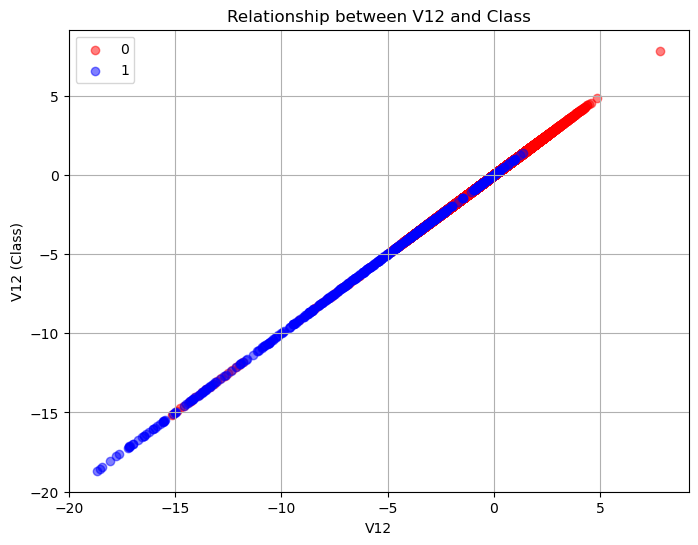

In [22]:
import matplotlib.pyplot as plt

# Example data (replace these with your actual data)
V12 =df['V12']  # Replace with your 'V5' data
Class =df['Class']  # Replace with your 'Class' data

# Plot
plt.figure(figsize=(8, 6))

# Scatter plot
for class_label, color in zip(set(Class), ['red', 'blue']):
    class_indices = [i for i, c in enumerate(Class) if c == class_label]
    plt.scatter([V12[i] for i in class_indices], 
                [V12[i] for i in class_indices],  # Using V5 as both x and y
                color=color, label=class_label, alpha=0.5)

plt.xlabel('V12')
plt.ylabel('V12 (Class)')
plt.title('Relationship between V12 and Class')
plt.legend()
plt.grid(True)
plt.show()

## As V12 increases the chances of fraud increase

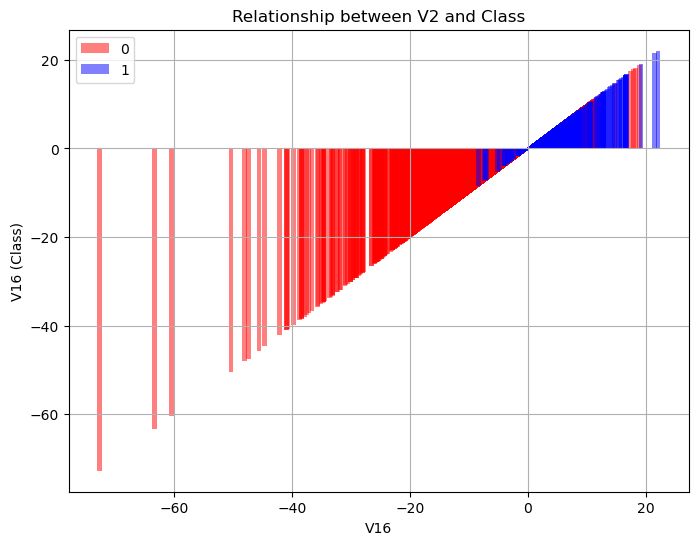

In [26]:
import matplotlib.pyplot as plt

# Example data (replace these with your actual data)
V16 = df['V16']  # Replace with your 'V2' data
Class = df['Class']  # Replace with your 'Class' data

# Plot
plt.figure(figsize=(8, 6))

# Scatter plot
for class_label, color in zip(set(Class), ['red', 'blue']):
    class_indices = [i for i, c in enumerate(Class) if c == class_label]
    plt.bar([V2[i] for i in class_indices], 
                [V2[i] for i in class_indices],  # Using V2 as both x and y
                color=color, label=class_label, alpha=0.5)

plt.xlabel('V16')
plt.ylabel('V16 (Class)')
plt.title('Relationship between V2 and Class')
plt.legend()
plt.grid(True)
plt.show()

## Comparing relationship between amount of transaction and fraud or not

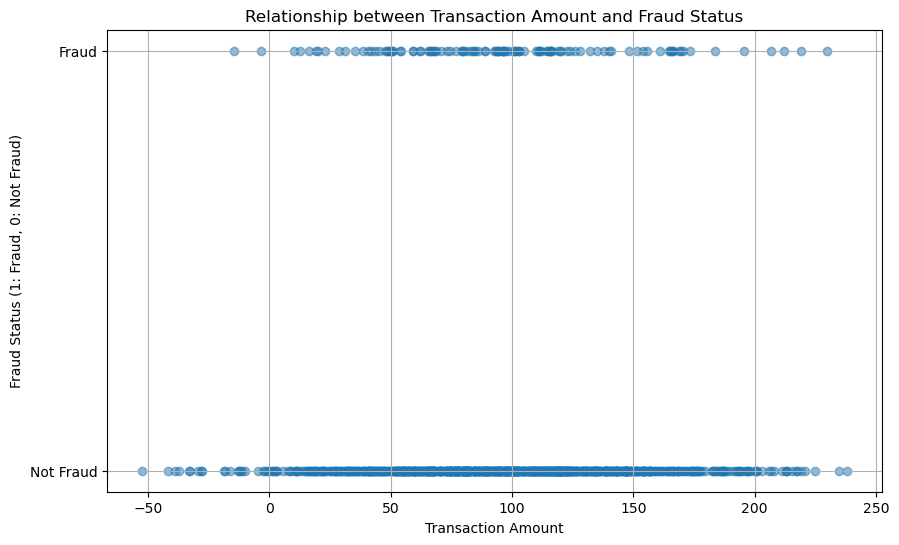

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
np.random.seed(0)
transaction_amounts = np.random.normal(loc=100, scale=50, size=1000)
fraud_status = np.random.choice([0, 1], size=1000, p=[0.9, 0.1])

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(transaction_amounts, fraud_status, alpha=0.5)
plt.title('Relationship between Transaction Amount and Fraud Status')
plt.xlabel('Transaction Amount')
plt.ylabel('Fraud Status (1: Fraud, 0: Not Fraud)')
plt.yticks([0, 1], ['Not Fraud', 'Fraud'])
plt.grid(True)
plt.show()

## It shows there is no relationship between amount of transaction and whether the transaction is fraud or not

## Fraud Vs Non Fraud Transactions comparing with Time

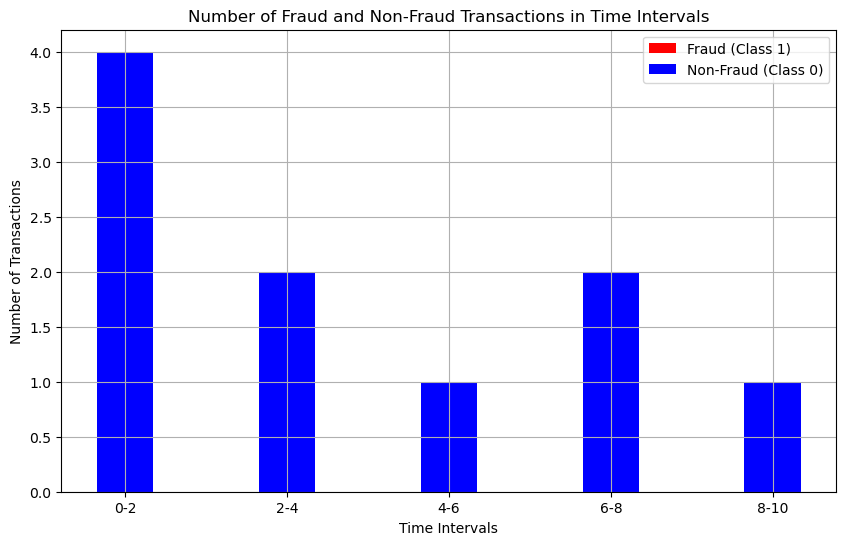

In [10]:
# Define time intervals
time_intervals = [(0, 2), (2, 4), (4, 6), (6, 8), (8, 10)]

# Initialize counters for fraud and non-fraud transactions in each time interval
fraud_counts = [0] * len(time_intervals)
non_fraud_counts = [0] * len(time_intervals)

# Count transactions in each time interval
for i, (start, end) in enumerate(time_intervals):
    interval_data = df[(df['Time'] >= start) & (df['Time'] < end)]
    fraud_counts[i] = interval_data['Class'].sum()
    non_fraud_counts[i] = (interval_data['Class'] == 0).sum()

# Create bar chart
bar_width = 0.35
index = range(len(time_intervals))

plt.figure(figsize=(10, 6))
plt.bar(index, fraud_counts, bar_width, label='Fraud (Class 1)', color='red')
plt.bar(index, non_fraud_counts, bar_width, label='Non-Fraud (Class 0)', color='blue', bottom=fraud_counts)
plt.xlabel('Time Intervals')
plt.ylabel('Number of Transactions')
plt.title('Number of Fraud and Non-Fraud Transactions in Time Intervals')
plt.xticks(index, [f"{start}-{end}" for start, end in time_intervals])
plt.legend()
plt.grid(True)
plt.show()

## We can interpret from this that when the time interval is less the chances that the transaction is fraud is less

## DATA CLEANING

## To check whether there are missing values in the dataset

In [11]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# There are no missing values in the dataset

## REMOVING OUTLIERS IN THE DATA

In [12]:
import pandas as pd

def remove_outliers_specific_columns(df):
    # Select only columns from 'V1' to 'V28'
    columns_to_check = ['V' + str(i) for i in range(1, 29)]
    
    # Calculate Q1 and Q3 for each column
    Q1 = df[columns_to_check].quantile(0.25)
    Q3 = df[columns_to_check].quantile(0.75)
    
    # Calculate IQR for each column
    IQR = Q3 - Q1
    
    # Define lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers from each column
    for col in columns_to_check:
        df = df[(df[col] >= lower_bound[col]) & (df[col] <= upper_bound[col])]
    
    return df

# Assuming df is your DataFrame
# Call the function to remove outliers for specific columns
cleaned_data = remove_outliers_specific_columns(df)

In [13]:
cleaned_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0


In [14]:
cleaned_data['Class'].value_counts()

Class
0    156135
1        15
Name: count, dtype: int64

## STANDARDIZATION OF DATA

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def standardize_data_except_class(df):
    # Select numerical columns to standardize excluding 'class'
    numerical_columns = cleaned_data.select_dtypes(include=['number']).columns
    numerical_columns = numerical_columns.drop('Class')
    
    # Initialize a StandardScaler object
    scaler = StandardScaler()
    
    # Fit the scaler to the data and transform it
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    
    return df

# Assuming df is your DataFrame
# Call the function to standardize the data
standardized_data = standardize_data_except_class(cleaned_data)

In [16]:
standardized_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.041208,-1.736801,-0.083389,2.030451,1.277846,-0.208622,1.264578,0.328646,0.228337,0.482731,...,0.045958,0.476955,-0.559307,0.128629,0.238204,-0.398784,1.068950,-0.404838,1.370253,0
1,-2.041208,0.425519,0.336540,0.030953,0.407591,0.301660,0.425871,-0.134621,0.184308,-0.220560,...,-0.801337,-0.905635,0.498812,-0.656022,0.329815,0.322495,-0.218207,0.049043,-0.646730,0
3,-2.041187,-1.403313,-0.222706,1.403271,-0.819602,0.211570,2.472896,0.325751,1.130988,-1.505812,...,-0.321573,0.065782,-0.958280,-2.268108,1.468589,-0.473919,0.429301,0.641919,1.011691,0
4,-2.041165,-1.565984,1.094281,1.197171,0.365370,-0.296850,0.700358,0.842752,-0.967361,0.998323,...,0.082208,1.262061,-0.694140,0.272026,-0.555156,1.184335,1.844305,2.591749,0.277132,0
5,-2.041165,-0.945450,1.196851,0.853265,-0.169215,0.764071,0.506906,0.672898,0.751708,-0.576340,...,-0.729779,-0.786691,-0.139200,-0.716939,-0.618673,0.276747,2.155138,0.890858,-0.633277,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284797,1.655636,-0.789489,0.889242,0.227814,-0.445406,0.538026,-1.516064,1.332247,-0.759063,0.190207,...,-0.813999,-0.718130,1.389780,0.716022,-1.392813,0.293301,1.050427,0.893202,-0.608293,0
284800,1.655678,1.143876,-0.210325,-1.119292,0.207738,0.213614,-0.565969,0.004842,-0.474145,0.564070,...,-0.973979,-1.024114,1.481383,-0.694451,-0.815065,0.494726,-0.866951,-1.090121,-0.646867,0
284801,1.655700,-0.482521,1.160279,-0.570190,-0.709001,1.672738,0.189366,1.162529,0.281430,-0.162224,...,-1.162480,-1.161859,0.244251,0.197824,-1.100254,0.318338,1.830920,0.735109,-0.646730,0
284803,1.655743,-1.205456,-0.061458,1.607481,-0.702911,1.337001,2.182234,0.015434,0.863607,0.733754,...,0.995531,1.452295,0.054977,-1.960729,-1.505185,-0.870785,0.481221,-0.816818,-0.343352,0


In [17]:
standardized_data['Class'].value_counts()

Class
0    156135
1        15
Name: count, dtype: int64

## Here we need to remove the duplicates 

In [18]:
import pandas as pd

def remove_duplicates(df):
    # Remove duplicates from the DataFrame
    cleaned_df = df.drop_duplicates() 
    return cleaned_df

# Assuming df is your DataFrame
# Call the function to remove duplicates
cleaned_data = remove_duplicates(standardized_data)

In [19]:
cleaned_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.041208,-1.736801,-0.083389,2.030451,1.277846,-0.208622,1.264578,0.328646,0.228337,0.482731,...,0.045958,0.476955,-0.559307,0.128629,0.238204,-0.398784,1.068950,-0.404838,1.370253,0
1,-2.041208,0.425519,0.336540,0.030953,0.407591,0.301660,0.425871,-0.134621,0.184308,-0.220560,...,-0.801337,-0.905635,0.498812,-0.656022,0.329815,0.322495,-0.218207,0.049043,-0.646730,0
3,-2.041187,-1.403313,-0.222706,1.403271,-0.819602,0.211570,2.472896,0.325751,1.130988,-1.505812,...,-0.321573,0.065782,-0.958280,-2.268108,1.468589,-0.473919,0.429301,0.641919,1.011691,0
4,-2.041165,-1.565984,1.094281,1.197171,0.365370,-0.296850,0.700358,0.842752,-0.967361,0.998323,...,0.082208,1.262061,-0.694140,0.272026,-0.555156,1.184335,1.844305,2.591749,0.277132,0
5,-2.041165,-0.945450,1.196851,0.853265,-0.169215,0.764071,0.506906,0.672898,0.751708,-0.576340,...,-0.729779,-0.786691,-0.139200,-0.716939,-0.618673,0.276747,2.155138,0.890858,-0.633277,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284797,1.655636,-0.789489,0.889242,0.227814,-0.445406,0.538026,-1.516064,1.332247,-0.759063,0.190207,...,-0.813999,-0.718130,1.389780,0.716022,-1.392813,0.293301,1.050427,0.893202,-0.608293,0
284800,1.655678,1.143876,-0.210325,-1.119292,0.207738,0.213614,-0.565969,0.004842,-0.474145,0.564070,...,-0.973979,-1.024114,1.481383,-0.694451,-0.815065,0.494726,-0.866951,-1.090121,-0.646867,0
284801,1.655700,-0.482521,1.160279,-0.570190,-0.709001,1.672738,0.189366,1.162529,0.281430,-0.162224,...,-1.162480,-1.161859,0.244251,0.197824,-1.100254,0.318338,1.830920,0.735109,-0.646730,0
284803,1.655743,-1.205456,-0.061458,1.607481,-0.702911,1.337001,2.182234,0.015434,0.863607,0.733754,...,0.995531,1.452295,0.054977,-1.960729,-1.505185,-0.870785,0.481221,-0.816818,-0.343352,0


In [20]:
cleaned_data['Class'].value_counts()

Class
0    155779
1        15
Name: count, dtype: int64

## DEALING IMBALANCED DATASET

In [21]:
cleaned_data['Class'].value_counts()

Class
0    155779
1        15
Name: count, dtype: int64

##  SMOTE, which stands for Synthetic Minority Over-sampling Technique.

SMOTE is a method used to address class imbalance by generating synthetic samples of the minority class. In imbalanced datasets, where one class (the minority class) is significantly underrepresented compared to another (the majority class), traditional machine learning algorithms may perform poorly because they tend to bias towards the majority class.

In [22]:
import pandas as pd
from sklearn.utils import resample

def balance_dataset(df):
    # Separate majority and minority classes
    df_majority = df[df['Class'] == 0]
    df_minority = df[df['Class'] == 1]
    
    # Upsample minority class (fraud)
    df_minority_upsampled = resample(df_minority,
                                     replace=True,
                                     n_samples=len(df_majority),
                                     random_state=42)
    
    # Combine majority class with upsampled minority class
    df_balanced = pd.concat([df_majority, df_minority_upsampled])
    
    return df_balanced

# Assuming df is your DataFrame
# Call the function to balance the dataset
balanced_data = balance_dataset(cleaned_data)

In [23]:
balanced_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.041208,-1.736801,-0.083389,2.030451,1.277846,-0.208622,1.264578,0.328646,0.228337,0.482731,...,0.045958,0.476955,-0.559307,0.128629,0.238204,-0.398784,1.068950,-0.404838,1.370253,0
1,-2.041208,0.425519,0.336540,0.030953,0.407591,0.301660,0.425871,-0.134621,0.184308,-0.220560,...,-0.801337,-0.905635,0.498812,-0.656022,0.329815,0.322495,-0.218207,0.049043,-0.646730,0
3,-2.041187,-1.403313,-0.222706,1.403271,-0.819602,0.211570,2.472896,0.325751,1.130988,-1.505812,...,-0.321573,0.065782,-0.958280,-2.268108,1.468589,-0.473919,0.429301,0.641919,1.011691,0
4,-2.041165,-1.565984,1.094281,1.197171,0.365370,-0.296850,0.700358,0.842752,-0.967361,0.998323,...,0.082208,1.262061,-0.694140,0.272026,-0.555156,1.184335,1.844305,2.591749,0.277132,0
5,-2.041165,-0.945450,1.196851,0.853265,-0.169215,0.764071,0.506906,0.672898,0.751708,-0.576340,...,-0.729779,-0.786691,-0.139200,-0.716939,-0.618673,0.276747,2.155138,0.890858,-0.633277,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93486,-0.662386,0.330327,1.088397,-0.365874,2.566583,0.611246,0.013371,-0.082308,0.707375,-0.815427,...,0.025751,-0.181429,-0.201202,-0.116841,0.783157,0.210503,0.033902,0.630711,-0.683657,1
93486,-0.662386,0.330327,1.088397,-0.365874,2.566583,0.611246,0.013371,-0.082308,0.707375,-0.815427,...,0.025751,-0.181429,-0.201202,-0.116841,0.783157,0.210503,0.033902,0.630711,-0.683657,1
124036,-0.390421,-1.190732,0.760815,0.865407,-0.262147,-0.497400,-0.400193,0.996059,0.134875,-0.081899,...,0.654696,0.418954,-0.458141,0.793434,-0.579146,0.844552,-0.700215,-0.030769,1.087192,1
55401,-1.037201,-0.992536,1.319534,0.436475,0.835637,1.274408,0.412287,0.713541,0.430301,-0.799388,...,0.409185,0.348206,-0.880025,-0.847108,0.500768,-0.464518,-0.794949,-0.005011,-0.669929,1


In [24]:
balanced_data['Class'].value_counts()

Class
0    155779
1    155779
Name: count, dtype: int64

## FEATURE ENGINEERING

In [25]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt

In [26]:
# Assume 'df' is your DataFrame containing features
# Calculate skewness for each feature
skewness = balanced_data.skew()

In [28]:
high_skew_features = skewness[abs(skewness) > 1].index

In [30]:
# Log-transform the selected features
for feature in high_skew_features:
    balanced_data[feature] = np.log1p(balanced_data[feature])

In [31]:
# After transformation, re-calculate skewness to ensure it's reduced
transformed_skewness = df[high_skew_features].skew()
print("Skewness after transformation:")
print(transformed_skewness)

Skewness after transformation:
Amount    16.977724
dtype: float64


## MODEL SELECTION

In [76]:
! pip install pycaret

Defaulting to user installation because normal site-packages is not writeable


## APPLYING LOGISTIC REGRESSION

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
X = balanced_data.drop(columns=['Class'])
y = balanced_data['Class']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [36]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

C:\Users\Pooja\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
# Make predictions
y_pred = lr_model.predict(X_test_scaled)

In [38]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.9636025163692387
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     31069
           1       0.93      1.00      0.96     31243

    accuracy                           0.96     62312
   macro avg       0.97      0.96      0.96     62312
weighted avg       0.97      0.96      0.96     62312



In [39]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[28801  2268]
 [    0 31243]]


## APPLYING DECISION TREES

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score


In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
# Initialize decision tree model
model = DecisionTreeClassifier()


In [43]:
# Fit the model on the training data
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
# Predict the labels on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9999518551803825


In [45]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31069
           1       1.00      1.00      1.00     31243

    accuracy                           1.00     62312
   macro avg       1.00      1.00      1.00     62312
weighted avg       1.00      1.00      1.00     62312



In [46]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[31066     3]
 [    0 31243]]


## APPLYING RANDOM FOREST

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Initialize Random Forest model
model = RandomForestClassifier(n_estimators=50, random_state=42)

In [51]:
# Fit the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [52]:
# Predict the labels on the testing data
y_pred = model.predict(X_test)


In [53]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [54]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31069
           1       1.00      1.00      1.00     31243

    accuracy                           1.00     62312
   macro avg       1.00      1.00      1.00     62312
weighted avg       1.00      1.00      1.00     62312



In [57]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[31069     0]
 [    0 31243]]


## As this is a classification problem here recall should be low as transactions predicted as not fraud but are fraud should be less.So, we will use logistic regression as it has low recall and good accuracy

# MODEL VALIDATION

## Performing model validation 

In [64]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
import numpy as np

# Assuming 'X' contains your feature matrix and 'y' contains the target variable
# Replace 'X' and 'y' with your actual feature matrix and target variable

# Define the number of folds for cross-validation
k_folds = 5

# Instantiate the logistic regression model
model = LogisticRegression()

# Create a k-fold cross-validation iterator
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)
print("Mean cross-validation score:", mean_cv_score)
print("Standard deviation of cross-validation scores:", std_cv_score)

C:\Users\Pooja\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pooja\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Cross-validation scores: [0.96105084 0.96068173 0.96125947 0.96096997 0.95824172]
Mean cross-validation score: 0.9604407472451412
Standard deviation of cross-validation scores: 0.0011150228371790724


C:\Users\Pooja\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## As the mean accuracy for k fold cross validation of Logistic regression is good we can surely use it in making the predictions.

## HYPER PARAMETER TUNING

In [63]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [65]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [66]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [67]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Penalty term
}

In [68]:
# Create logistic regression model
lr_model = LogisticRegression()


In [69]:
# Grid search for hyperparameter tuning
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

C:\Users\Pooja\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pooja\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [70]:
# Print best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'C': 100, 'penalty': 'l2'}


In [71]:
# Get the best model
best_lr_model = grid_search.best_estimator_

In [72]:
# Make predictions on the testing set using the best model
y_pred = best_lr_model.predict(X_test)


In [73]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9696206188214148


In [74]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     31069
           1       0.94      1.00      0.97     31243

    accuracy                           0.97     62312
   macro avg       0.97      0.97      0.97     62312
weighted avg       0.97      0.97      0.97     62312



In [75]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[29176  1893]
 [    0 31243]]


## MODEL DEPLOYMENT PLAN

In [15]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable


In [16]:
import joblib

# Assuming you have a trained model named "model" (replace this with your actual model object)
# Example:
# model = YourTrainedModel()

# Save the model to a file
joblib.dump(model, 'your_model.pkl')

['your_model.pkl']

In [17]:
import joblib

# Load the model from the file
model = joblib.load('your_model.pkl')

In [18]:
from flask import Flask, request, jsonify
import joblib

In [19]:
# Initialize Flask application
app = Flask(__name__)

In [20]:
# Load the trained model
model = joblib.load('your_model.pkl')

In [38]:
def predict_endpoint():
    # Get data from the request
    data = request.get_json(force=True)
    
    # Extract features from the request data
    features = data['features']
    
    # Make prediction using the model
    prediction = model.predict([features])[0]
    
    # Map the prediction to class label
    target_names = iris.target_names
    predicted_class = target_names[prediction]
    
    # Return the prediction as JSON response
    return jsonify({'prediction': predicted_class})


In [39]:
# Run the Flask app
if __name__ == '__main__':
    # Run the app on localhost and port 5000
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
INFO:werkzeug:Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)
INFO:werkzeug: * Restarting with watchdog (windowsapi)


SystemExit: 1